In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Machine Leraning Projects/Crop-Yield-Prediction-Using-Machin-Learning-Python-main/Crop-Yield-Prediction-Using-Machin-Learning-Python-main/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df.shape

(28242, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [7]:
df.duplicated().sum()

2310

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,25932.0,2001.556455,7.055924,1990.00,1995.00,2001.00,2008.00,2013.00
hg/ha_yield,25932.0,76978.132925,84647.605552,50.00,19996.00,39530.00,104168.00,501412.00
average_rain_fall_mm_per_year,25932.0,1146.836688,717.391098,51.00,593.00,1083.00,1668.00,3240.00
pesticides_tonnes,25932.0,34782.573241,57228.568244,0.04,1597.00,15373.00,45620.00,367778.00
avg_temp,25932.0,20.422251,6.439402,1.30,16.58,21.42,26.06,30.65


In [11]:
df.shape

(25932, 7)

In [12]:
len(df['Area'].unique())

101

In [13]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [14]:
df.rename(columns = {'Area' : 'Country'},inplace = True)

In [15]:
df.columns

Index(['Country', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

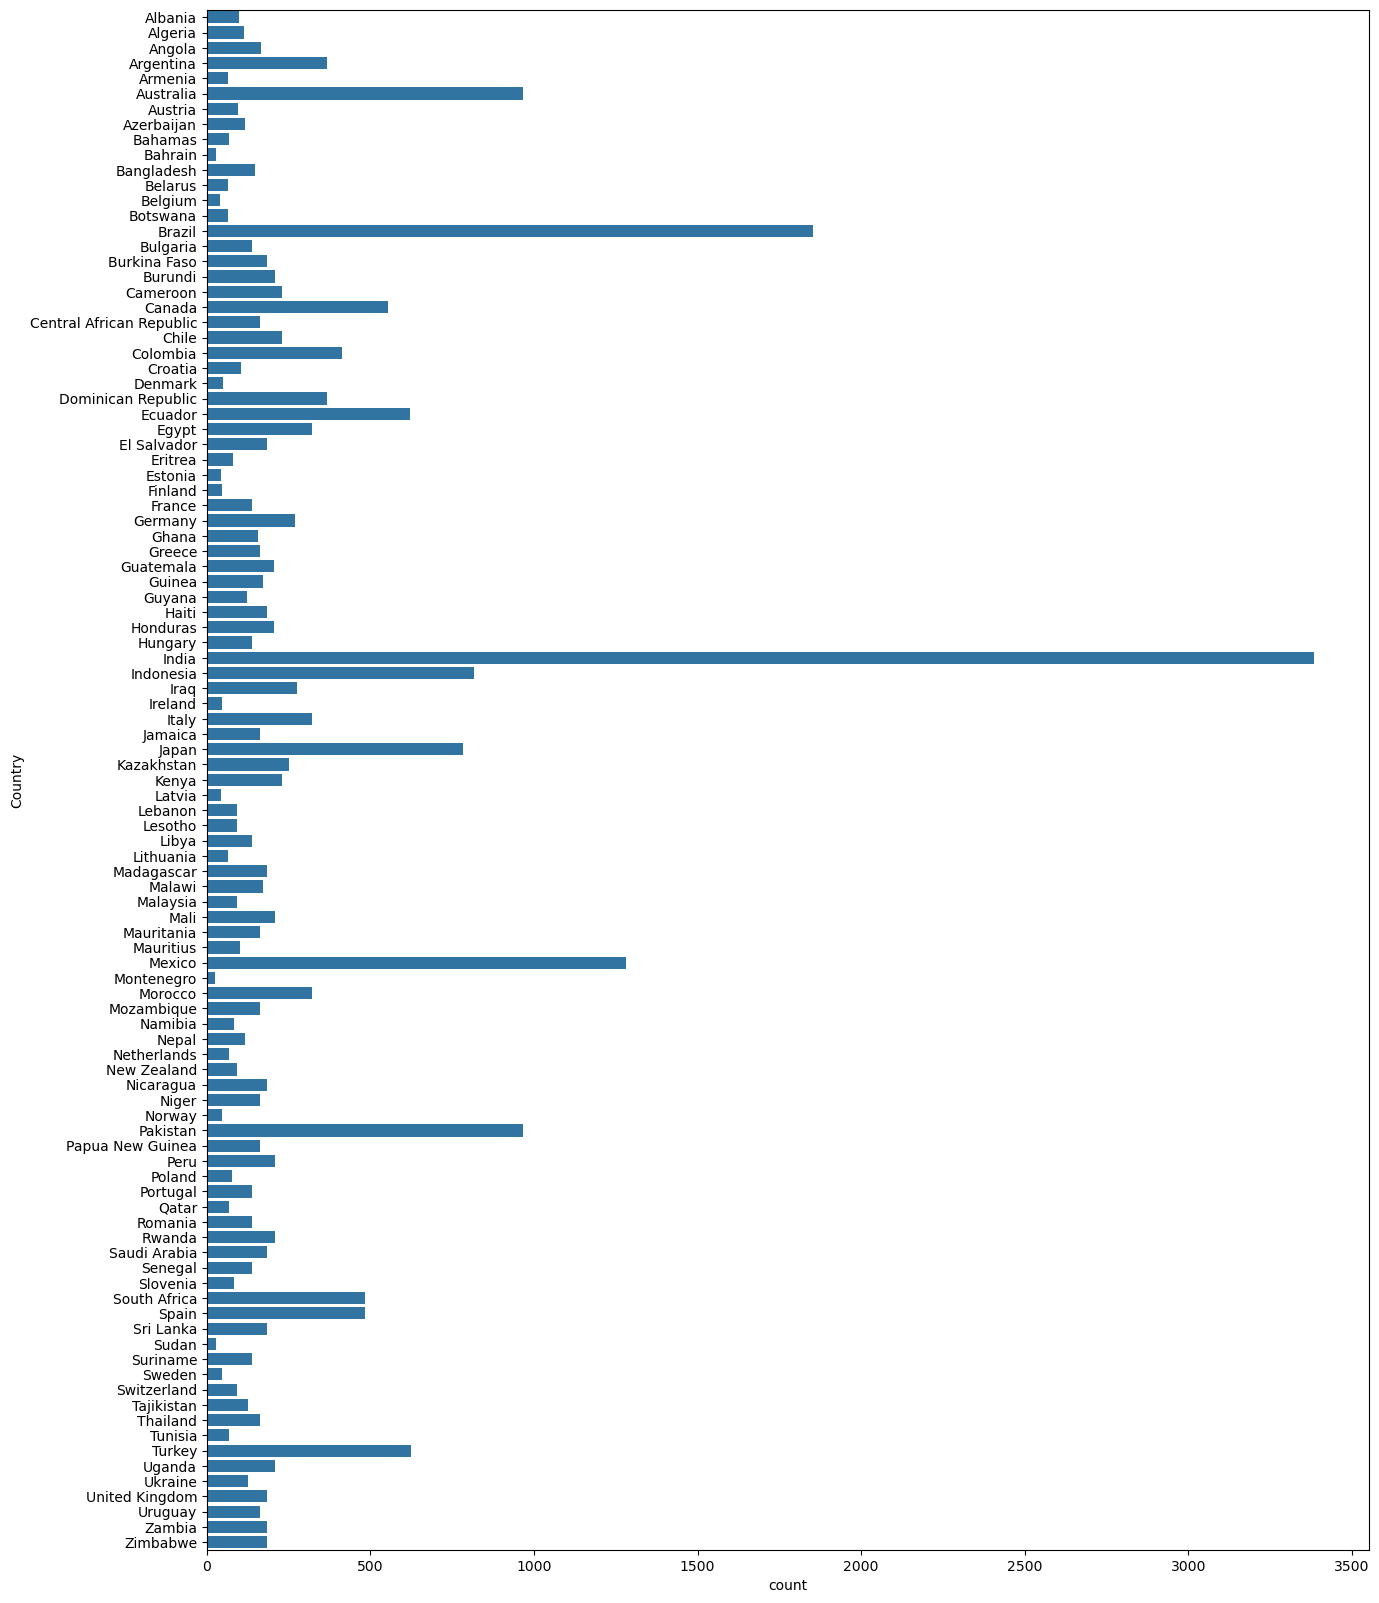

In [16]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Country'])
plt.show()

In [17]:
country = df['Country'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Country']==state]['hg/ha_yield'].sum())

In [18]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

<Axes: >

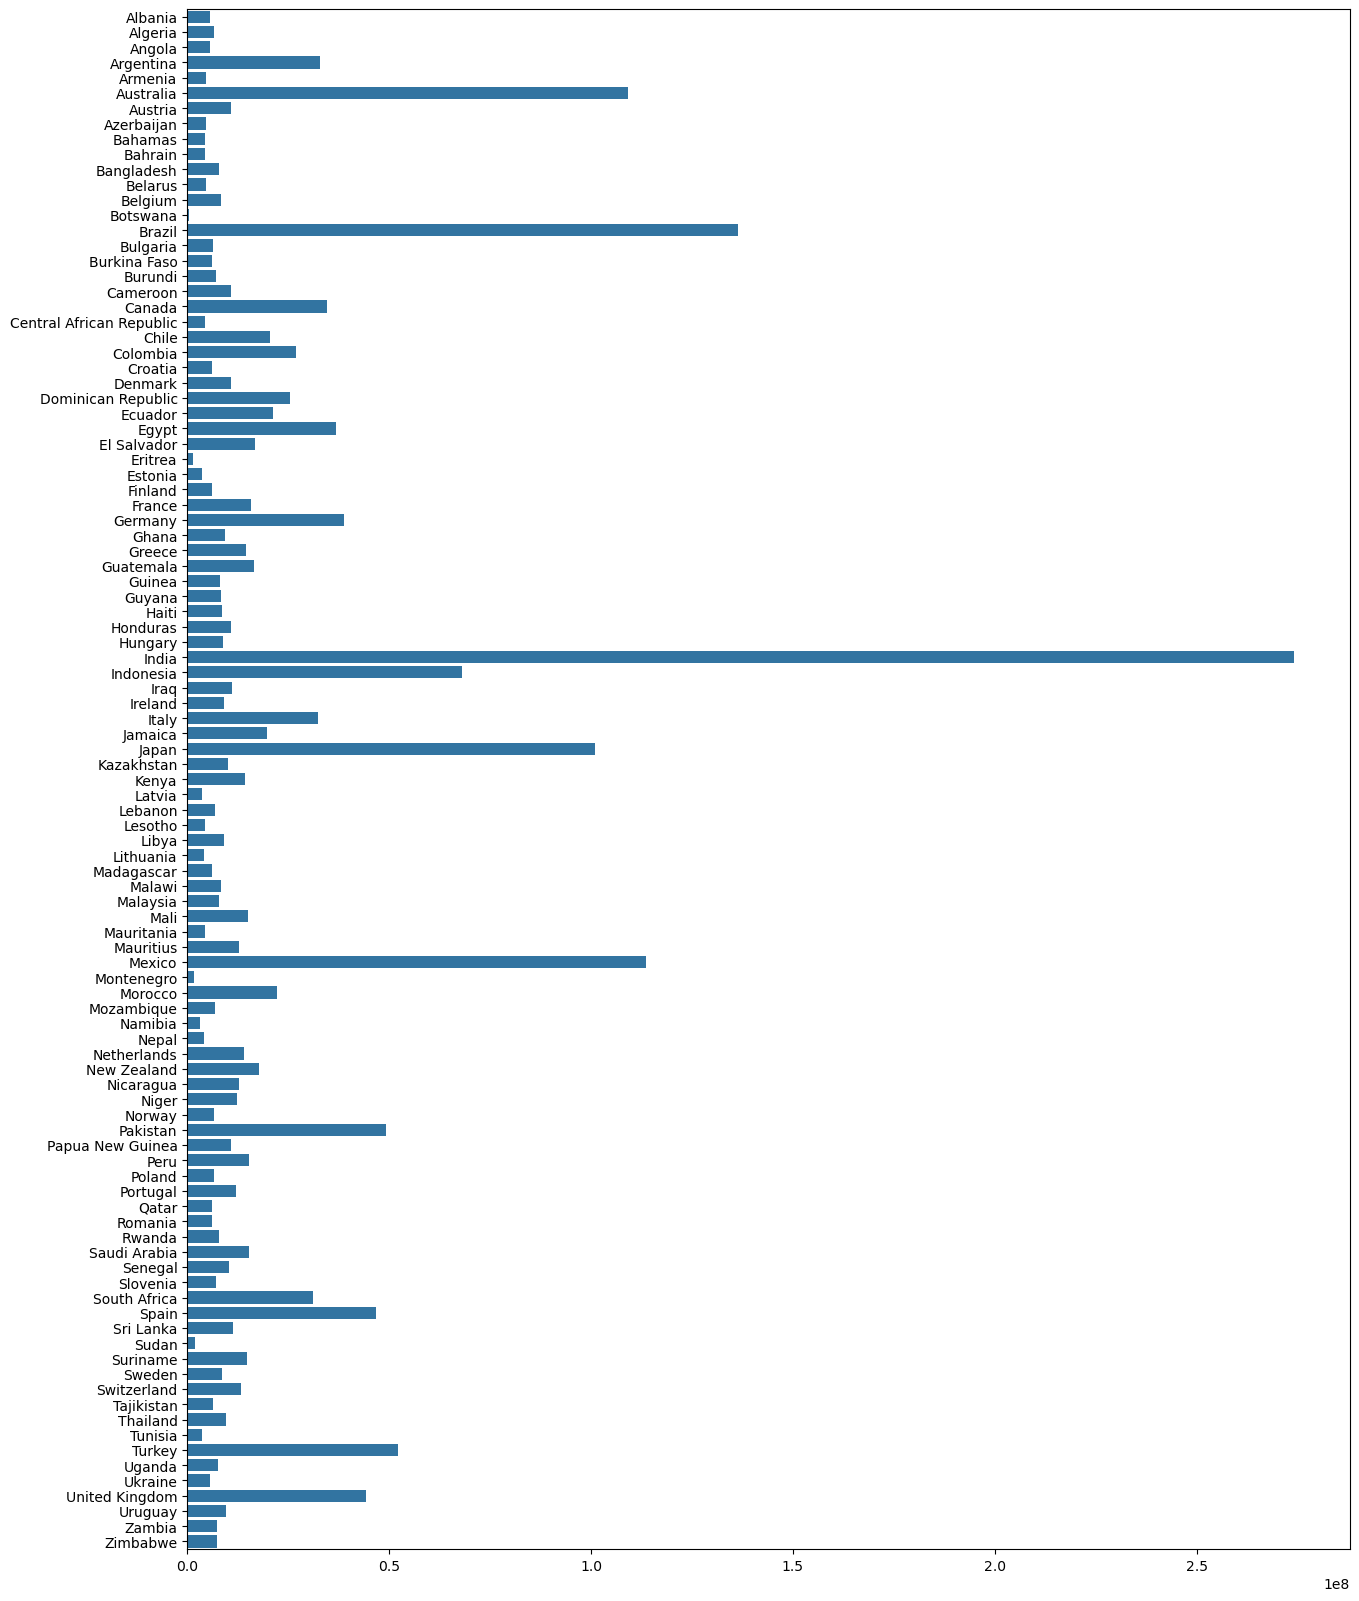

In [19]:
plt.figure(figsize=(15, 20))
sns.barplot(y=country, x=yield_per_country)

In [20]:
df['Item'].value_counts()

Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item'>

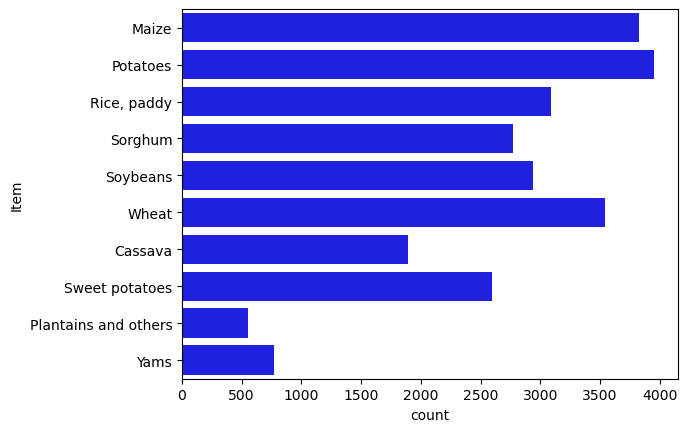

In [21]:
sns.countplot(y=df['Item'],color = 'blue')

In [22]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

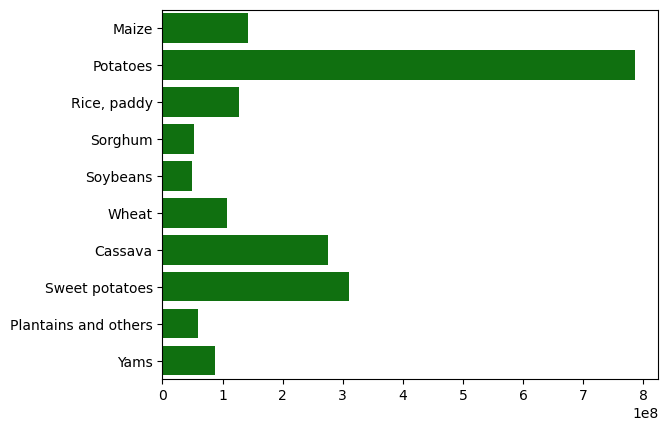

In [23]:
sns.barplot(y=crops,x=yield_per_crop,color = 'green')

In [24]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Country', 'Item', 'hg/ha_yield']
df = df[col]

In [25]:
df.head(10)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000
5,1990,1485.0,121.0,16.37,Albania,Wheat,30197
6,1991,1485.0,121.0,15.36,Albania,Maize,29068
7,1991,1485.0,121.0,15.36,Albania,Potatoes,77818
8,1991,1485.0,121.0,15.36,Albania,"Rice, paddy",28538
9,1991,1485.0,121.0,15.36,Albania,Sorghum,6667


In [26]:
X = df.drop('hg/ha_yield',axis = 1 )
y = df['hg/ha_yield']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [35]:
X_train.shape

(20745, 6)

In [36]:
X_test.shape

(5187, 6)

In [37]:
X_train.head(5)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes


In [31]:
X_test.head(4)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
17096,2012,1668.0,54716.40,13.11,Japan,Wheat
723,2012,591.0,136185.08,18.18,Argentina,Soybeans
7132,1992,1410.0,4971.00,26.45,Dominican Republic,Sorghum
8552,2009,1784.0,3333.88,26.21,El Salvador,Sweet potatoes


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [40]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 1, 2, 3]),
                                ('OHE', OneHotEncoder(drop='first'), [4, 5])])

In [39]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [41]:
X_train

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
24234,2000,59.0,3024.11,26.55,Saudi Arabia,Sorghum
9468,2012,652.0,8002.20,18.82,Greece,Sweet potatoes
6793,2006,3240.0,98328.63,27.51,Colombia,Maize
28212,2010,657.0,3305.17,21.17,Zimbabwe,Potatoes
7358,2007,1410.0,5689.80,27.08,Dominican Republic,Sweet potatoes
...,...,...,...,...,...,...
23678,2004,854.0,16942.00,16.31,Portugal,Sweet potatoes
5960,2006,537.0,36572.75,7.85,Canada,Wheat
860,1991,534.0,17866.00,18.73,Australia,Potatoes
17223,1998,250.0,6416.14,6.94,Kazakhstan,Potatoes


In [43]:
X_test

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
345,2010,1010.0,40.00,24.44,Angola,Cassava
26405,2006,1622.0,41220.00,27.92,Thailand,Soybeans
27032,2010,593.0,38554.69,13.80,Turkey,Maize
24736,1996,495.0,19508.00,15.23,South Africa,Sorghum
6053,2010,537.0,61050.00,9.47,Canada,Wheat
...,...,...,...,...,...,...
19986,2006,758.0,50891.95,20.30,Mexico,Sweet potatoes
6994,2004,1113.0,2174.00,10.06,Croatia,Wheat
27921,1995,1020.0,716.00,21.86,Zambia,Wheat
13777,2009,1083.0,28707.01,27.82,India,Sorghum


In [42]:
X_train_dummy

<20745x113 sparse matrix of type '<class 'numpy.float64'>'
	with 122877 stored elements in Compressed Sparse Row format>

In [50]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score

In [76]:
models = {
    'Linear Regression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'KNeighbor':KNeighborsRegressor(),
    'Decision Tree regressor':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),
    'XGB Regressor': XGBRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name} : Mean Absolute Error : {mean_absolute_error(y_test,y_pred)},Mean Squared Error : {mean_squared_error(y_test,y_pred)},RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))},R2 score : {r2_score(y_test,y_pred)*100}")

Linear Regression : Mean Absolute Error : 29920.707320750502,Mean Squared Error : 1821714697.3416271,RMSE: 42681.54984699627,R2 score : 74.86558935707826
Lasso : Mean Absolute Error : 29907.64138249029,Mean Squared Error : 1822234027.6229124,RMSE: 42687.633193032765,R2 score : 74.85842409647616
Ridge : Mean Absolute Error : 29875.693178464877,Mean Squared Error : 1822578331.1308055,RMSE: 42691.665827545374,R2 score : 74.85367370072768
KNeighbor : Mean Absolute Error : 4859.492539039908,Mean Squared Error : 127913289.58507806,RMSE: 11309.875754626046,R2 score : 98.23516539016241
Decision Tree regressor : Mean Absolute Error : 4087.293811451706,Mean Squared Error : 161734430.00944668,RMSE: 12717.485207754193,R2 score : 97.76853116193858
Random Forest : Mean Absolute Error : 3994.5918777713514,Mean Squared Error : 111957119.65136789,RMSE: 10580.979144264858,R2 score : 98.45531453206007
XGB Regressor : Mean Absolute Error : 8952.575687382707,Mean Squared Error : 245799122.98581395,RMSE: 15

In [77]:
rf = RandomForestRegressor()
rf.fit(X_train_dummy,y_train)
rf.predict(X_test_dummy)

array([126350.7 ,  15555.56,  72851.59, ...,  48869.15,   9621.  ,
       131947.82])

In [79]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Country, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Country, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = rf.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

In [80]:
Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

In [81]:
result

array([33291.61])

In [83]:
import pickle
pickle.dump(rf,open('rf.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))